**I Data Loading**

In [65]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pathlib as Path
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

df_train = pd.read_csv('../input/train.csv',parse_dates=['pickup_datetime','dropoff_datetime'])
df_test = pd.read_csv('../input/test.csv',parse_dates=['pickup_datetime'])

['train.csv', 'sample_submission.csv', 'test.csv']


**II Data Exploration**

In [66]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [67]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [68]:
df_test.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [69]:
df_test.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000,625134.000000
mean,1.534884,1.661765,-73.973614,40.750927,-73.973458,40.751816
std,0.498782,1.311293,0.073389,0.029848,0.072565,0.035824
min,1.000000,0.000000,-121.933128,37.389587,-121.933327,36.601322
25%,1.000000,1.000000,-73.991852,40.737392,-73.991318,40.736000
50%,2.000000,1.000000,-73.981743,40.754093,-73.979774,40.754543
75%,2.000000,2.000000,-73.967400,40.768394,-73.963013,40.769852
max,2.000000,9.000000,-69.248917,42.814938,-67.496796,48.857597


**III Data Preprocessing**

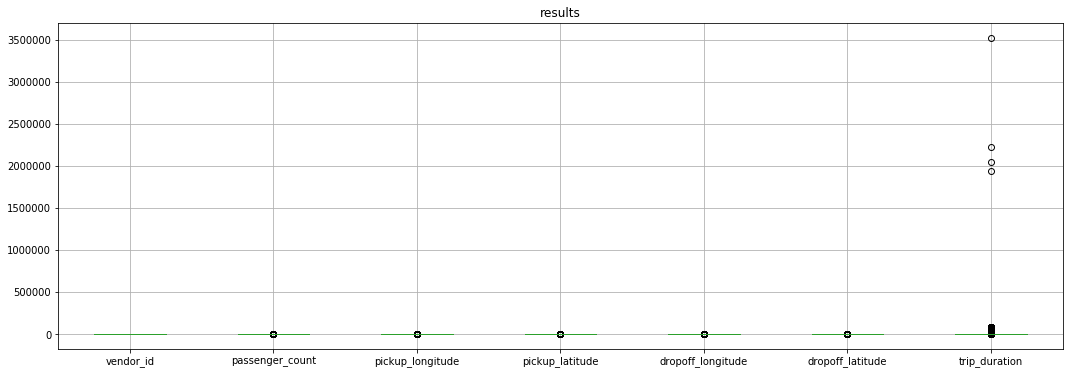

In [70]:
plt.subplots(figsize=(18,6))
plt.title("results")
df_train.boxplot();

In [71]:
df_train = df_train[df_train['passenger_count']>=1]
df_train = df_train[df_train['trip_duration']<=5000]

df_train['year'] = df_train['pickup_datetime'].dt.year
df_train['month'] = df_train['pickup_datetime'].dt.month
df_train['day'] = df_train['pickup_datetime'].dt.day
df_train['hour'] = df_train['pickup_datetime'].dt.hour
df_train['minute'] = df_train['pickup_datetime'].dt.minute
df_train['second'] = df_train['pickup_datetime'].dt.second

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1454812 entries, 0 to 1458643
Data columns (total 17 columns):
id                    1454812 non-null object
vendor_id             1454812 non-null int64
pickup_datetime       1454812 non-null datetime64[ns]
dropoff_datetime      1454812 non-null datetime64[ns]
passenger_count       1454812 non-null int64
pickup_longitude      1454812 non-null float64
pickup_latitude       1454812 non-null float64
dropoff_longitude     1454812 non-null float64
dropoff_latitude      1454812 non-null float64
store_and_fwd_flag    1454812 non-null object
trip_duration         1454812 non-null int64
year                  1454812 non-null int64
month                 1454812 non-null int64
day                   1454812 non-null int64
hour                  1454812 non-null int64
minute                1454812 non-null int64
second                1454812 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(9), object(2)
memory usage: 199.8+ MB


In [72]:
selected_columns = ['year','month','day','hour','minute','second','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count']

x_train = df_train[selected_columns]
y_train = df_train['trip_duration']
x_train.shape, y_train.shape

((1454812, 11), (1454812,))

In [73]:
rf = RandomForestRegressor()
random_split = ShuffleSplit(n_splits = 3, test_size = 0.05, train_size=0.1, random_state=0)
looses = -cross_val_score(rf, x_train, y_train, cv = random_split, scoring = 'neg_mean_squared_log_error')
looses = [np.sqrt(l) for l in looses]
np.mean(looses)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.4523103227552805

In [74]:
rf.fit(x_train, y_train)


/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [75]:


df_test['year'] = df_test['pickup_datetime'].dt.year
df_test['month'] = df_test['pickup_datetime'].dt.month
df_test['day'] = df_test['pickup_datetime'].dt.day
df_test['hour'] = df_test['pickup_datetime'].dt.hour
df_test['minute'] = df_test['pickup_datetime'].dt.minute
df_test['second'] = df_test['pickup_datetime'].dt.second

x_test = df_test[selected_columns]

In [76]:
pred_test = rf.predict(x_test)
pred_test.mean()

844.3672721368538

In [77]:
submission = pd.read_csv('../input/sample_submission.csv') 
submission.head()

,id,trip_duration
0,id3004672,959
1,id3505355,959
2,id1217141,959
3,id2150126,959
4,id1598245,959


In [78]:
submission['trip_duration'] = pred_test

In [79]:
submission.to_csv('submission.csv', index=False)